In [89]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [90]:
#reading the CSV file
x = pd.read_csv("sms-spam.csv")

#displaying the dataframe
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [91]:
#dataset size - 5572 rows x 5 columns
x.shape

(5572, 5)

In [92]:
x.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data Cleaning

In [93]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [94]:
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [95]:
x.columns

Index(['v1', 'v2'], dtype='object')

In [96]:
x.rename(columns={'v1':'Result','v2':'Input'},inplace=True)

In [97]:
x.head()

,Result,Input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
x['Result'].value_counts()

Result
ham     4825
spam     747
Name: count, dtype: int64

In [99]:
x.isnull().sum()

Result    0
Input     0
dtype: int64

In [100]:
x.duplicated().sum()

403

In [101]:
x.drop_duplicates(inplace=True)

In [102]:
x.duplicated().sum()

0

In [103]:
x.shape #no. of (rows,columns)

(5169, 2)

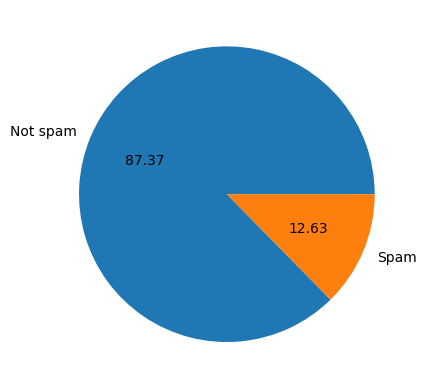

In [104]:
import matplotlib.pyplot as plt
plt.pie (x['Result'].value_counts(),labels=['Not spam','Spam'],autopct='%0.2f')
plt.show()

In [105]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aniru\AppData\Roaming\nltk_data...
[

True

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [109]:
x=x.replace({"ham":0,"spam":1})

In [110]:
x.head()

,Result,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA - Exploratory Data Analysis

In [111]:
nltk.download('punkt', download_dir='/path/to/nltk_data')


[nltk_data] Downloading package punkt to /path/to/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
def transform_text(text):
  useful_words=[]
  text=text.lower()
  words=nltk.word_tokenize(text)
  for word in words:
    if word not in stopwords:
      useful_words.append(word)
  return " ".join(useful_words)

In [114]:
transform_text("I am a good boy")

'good boy'

In [115]:
nltk.download('punkt', download_dir='/path/to/nltk_data')


[nltk_data] Downloading package punkt to /path/to/nltk_data...


[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
x=x.replace({"ham":0,"spam":1})

# Creating a new column with the count of characters
x['countCharacters'] = x['Input'].apply(len)

# Creating a new column with the count of words
x['countWords'] = x['Input'].apply(lambda i: len(nltk.word_tokenize(i)))

# Creating a new column with the count of sentences
x['countSentences'] = x['Input'].apply(lambda i: len(nltk.sent_tokenize(i)))

print(x)


      Result                                              Input  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      countCharacters  countWords  countSentences  
0                 111          24               2  
1                  29           8               2  
2                 155          37      

In [117]:
x.rename(columns={'v1':'Result','v2':'input'},inplace=True)

In [118]:
x.head()


,Result,Input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [119]:
x.rename(columns={'Result':'v1','input':'v2'},inplace=True)

In [120]:
x.head()

,v1,Input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [121]:
#extracting the 5 number summary of the 3 new column values
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [122]:
#for not SPAM
x[x['v1'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [123]:
#for SPAM
x[x['v1'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

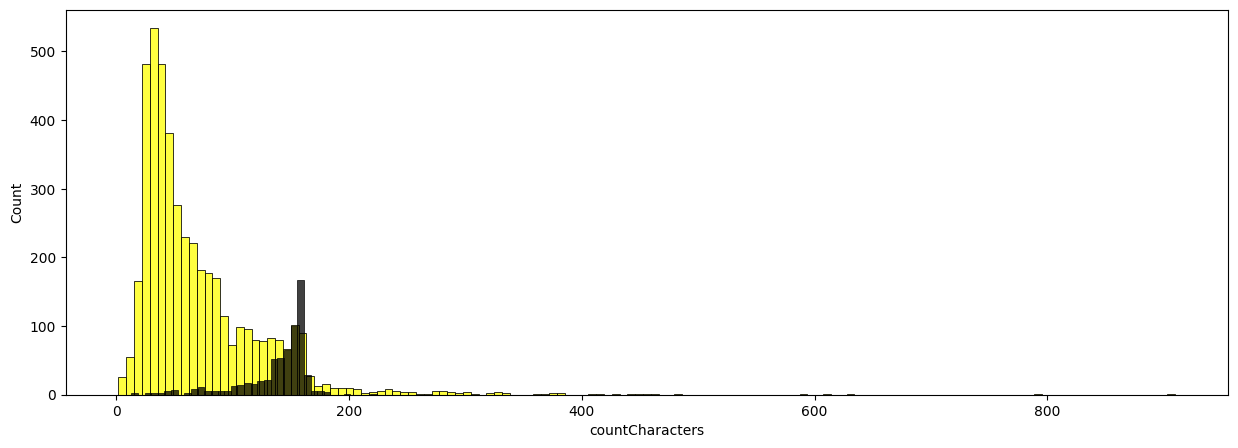

In [124]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['v1'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['v1'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

<Axes: xlabel='countWords', ylabel='Count'>

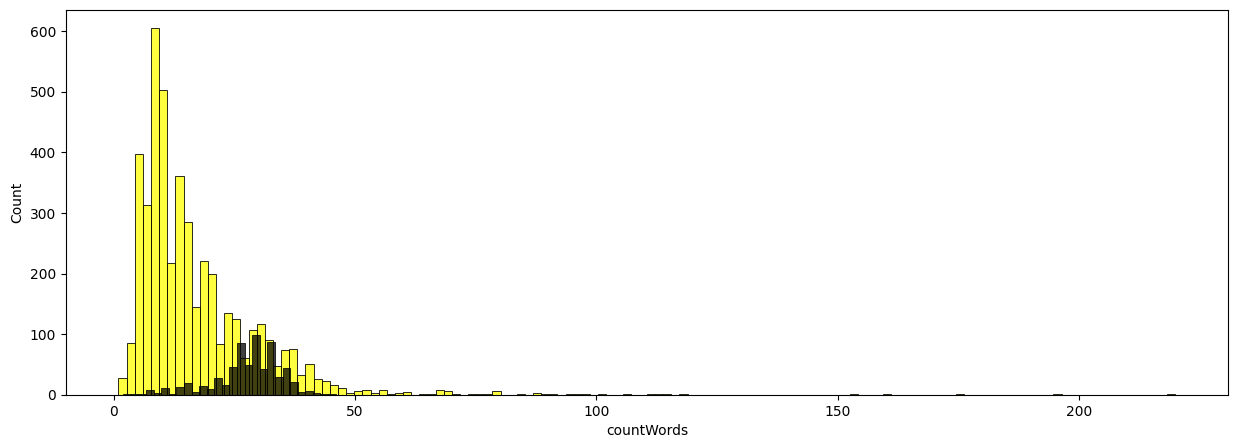

In [125]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['v1'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['v1'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

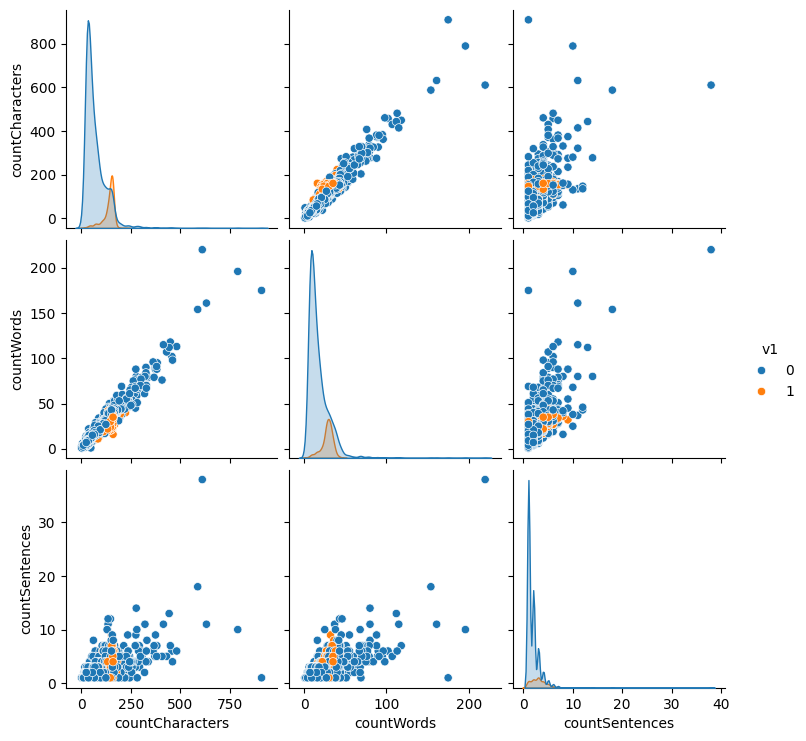

In [126]:
#finding relationship between the columns
sns.pairplot(x, hue='v1')

In [127]:
def transform_text (text):

    #converting to lower case
    text = text.lower()

    #tokenization
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    #updating the text after removed special characters
    text = removedSC[:]

    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]

    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [128]:
from nltk.corpus import stopwords
import string


In [129]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [130]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    # Tokenize the text
    words = text.split()
    # Remove stopwords and punctuation
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english') and word not in string.punctuation]
    return ' '.join(filtered_words)


In [131]:
#will create a new column to store the transformed text -> 'processed'
x['processed'] = x['Input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

,v1,Input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [132]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

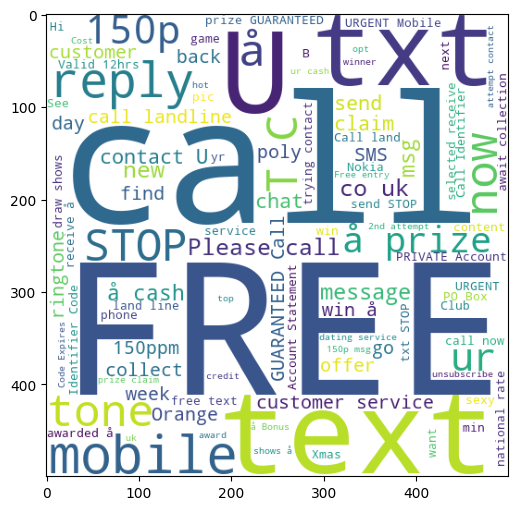

In [133]:
#creating a wordcloud for the SPAM messages
spam_text = x[x['v1'] == 1]['processed'].str.cat(sep=" ")

# Check if spam_text is empty and handle it
if not spam_text.strip():
    print("Warning: No words found in spam messages after preprocessing. Word cloud cannot be generated.")
else:
    spamWC = wc.generate(spam_text)
    #creating figure and displaying
    plt.figure(figsize=(12, 6))
    plt.imshow(spamWC)

In [134]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['v1'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['Free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'FreeMsg',
 'Hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "I'd",
 'like',
 'fun',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'send,',
 'å£1.50',
 'rcv',
 'WINNER!!',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'claim',
 'call',
 '09061701461.',
 'Claim',
 'code',
 'KL341.',
 'Valid',
 '12',
 'hours',
 'only.',
 'mobile',
 '11',
 'months',
 'more?',
 'U',
 'R',
 'entitled',
 'Update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'Free!',
 'Call',
 'Mobile',
 'Update',
 'Co',
 'FREE',
 '08002986030',
 'SIX',
 'chances',
 'win',
 'CASH!',
 '100',
 '20,000',
 'pounds',
 'txt>',
 'CSH11',
 'send',
 '87575.',
 'Cost',
 '150p/day,',
 '6days,',
 '16+',
 'TsandCs',
 'apply',
 'Reply',
 'HL',
 '

## Data Preprocessing

In [135]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 163),
 ('2', 151),
 ('Call', 116),
 ('ur', 86),
 ('FREE', 75),
 ('4', 75),
 ('mobile', 71),
 ('claim', 63),
 ('text', 61),
 ('U', 58),
 ('Txt', 55),
 ('txt', 54),
 ('reply', 54),
 ('free', 53),
 ('contact', 51),
 ('send', 41),
 ('prize', 40),
 ('new', 39),
 ('get', 39),
 ('per', 39),
 ('STOP', 39),
 ('Reply', 38),
 ('u', 38),
 ('now!', 37),
 ('service', 37),
 ('cash', 37),
 ('stop', 37),
 ('Nokia', 37),
 ('Text', 30),
 ('awarded', 30),
 ('Free', 29),
 ('Please', 29),
 ('draw', 29),
 ('shows', 29),
 ('URGENT!', 28),
 ('å£1000', 27),
 ('receive', 25),
 ('1', 25),
 ('Get', 25),
 ('number', 25)]

In [136]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

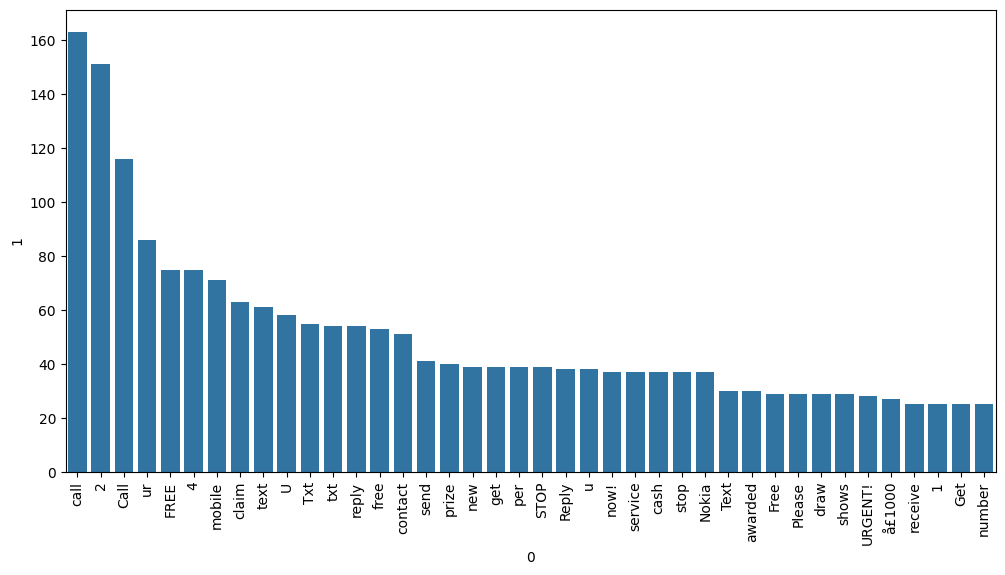

In [137]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [138]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [139]:
x.rename(columns={'v1':'Result','v2':'Input'},inplace=True)

In [140]:
x['processed'] = x['Input'].apply(transform_text)

In [141]:
#transforming the data of processed column
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(5169, 8651)

## Model Building

In [142]:
#storing the values of the 'result' column
y = x['Result'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [144]:
#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
# Change pos_label to 'spam' to match the labels in y_test and y_pred1
print(precision_score(y_test, y_pred1,))

0.9119922630560928
[[821  78]
 [ 13 122]]
0.61


In [146]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
# Changed pos_label to 'spam' to match the labels in y_test and y_pred2
print(precision_score(y_test, y_pred2,))

0.97678916827853
[[882  17]
 [  7 128]]
0.8827586206896552


In [147]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   6]
 [ 25 110]]
0.9482758620689655


In [148]:
#using 'TfidfVectorizer' for vectorization
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['Result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [149]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.90715667311412
[[820  79]
 [ 17 118]]
0.5989847715736041


In [150]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[899   0]
 [ 42  93]]
1.0


In [151]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   6]
 [ 25 110]]
0.9482758620689655


In [152]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))#dump method is used to uplosd the objects into the file
pickle.dump(mnb,open('model.pkl','wb')) #wb=write binary